In [1]:
#Loading libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error 
from sklearn import decomposition
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import normalize
from sklearn.impute import KNNImputer
%matplotlib inline

### Primero importamos los datasets y realizamos una primera visualizacion.

In [2]:
temperatura = pd.read_csv("temperature.csv")
temperatura = temperatura.set_index('Year')
temperatura = temperatura.drop('Upper bound (95% CI)',1)
temperatura = temperatura.drop('Entity',1)
temperatura = temperatura.drop('Lower bound (95% CI)',1)
temperatura

,Median temperature anomaly from 1961-1990 average
Year,
1990,0.296
1991,0.254
1992,0.105
1993,0.148
1994,0.208
1995,0.325
1996,0.183
1997,0.390
1998,0.539


In [3]:
ghg = pd.read_csv("ghg-emissions-by-sector.csv")
nombres_columnas = list(ghg.columns)
imputer = KNNImputer(n_neighbors=4, weights="uniform")
data = pd.DataFrame(data=imputer.fit_transform(ghg.drop(['Entity','Code','Year'],1)),columns=nombres_columnas[3:])
ghg = pd.concat([ghg['Year'], data], axis=1, sort=False)
ghg = ghg.sort_values('Year')
ghg = ghg.groupby(['Year']).sum()
ghg['Total'] = ghg['Agriculture (GHG Emissions, CAIT)'] + ghg['Bunker Fuels (GHG Emissions, CAIT)'] + ghg['Industry (GHG Emissions, CAIT)'] + ghg['Land-Use Change and Forestry (GHG Emissions, CAIT)'] + ghg['Waste (GHG Emissions, CAIT)'] + ghg['Buildings (GHG Emissions, CAIT)'] + ghg['Electricity & Heat (GHG Emissions, CAIT)'] + ghg['Fugitive from energy production (GHG Emissions, CAIT)'] + ghg['Manufacturing/Construction energy (GHG Emissions, CAIT)'] + ghg['Other Fuel Combustion (GHG Emissions, CAIT)'] + ghg['Transport (GHG Emissions, CAIT)']
ghg['Total'] = (ghg['Total']-ghg['Total'].mean())/ghg['Total'].std()
result = pd.concat([temperatura, ghg], axis=1, sort=False)
result['Year'] = result.index
nombres_columnas = list(result.columns)
for i in range(81):
  result.at[2020 + i,'Year'] = 2020 + i
result = result.drop(nombres_columnas[1:-2],1)
result

,Median temperature anomaly from 1961-1990 average,Total,Year
Year,,,
1990,0.296,-1.193332,1990.0
1991,0.254,-1.170972,1991.0
1992,0.105,-1.202903,1992.0
1993,0.148,-1.194477,1993.0
1994,0.208,-1.154909,1994.0
...,...,...,...
2096,NaN,NaN,2096.0
2097,NaN,NaN,2097.0
2098,NaN,NaN,2098.0


### Hacemos un analisis exploratorio de datos

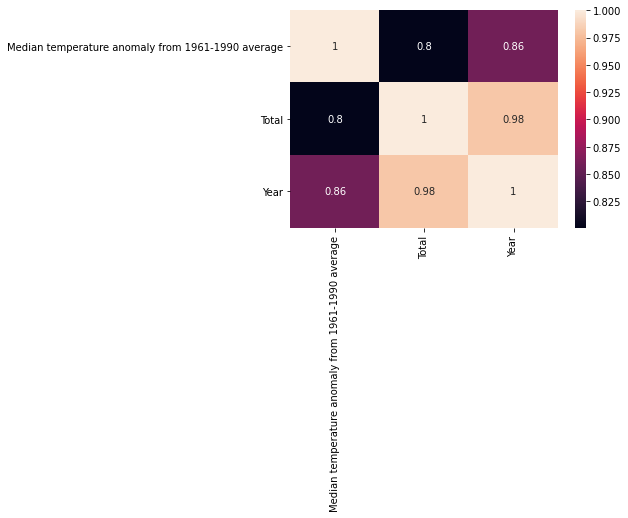

In [4]:
sns.heatmap(result.corr(),annot=True)

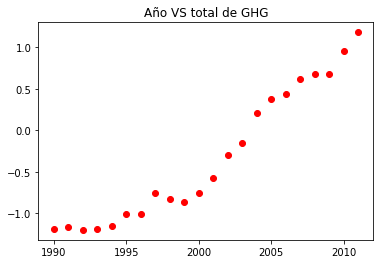

In [5]:
data = result.iloc[0:22,:] # Data for modelling
y = data['Total']
x_1 = data['Year']

# Plot outputs
fig,ax = plt.subplots()
ax.set_title("Año VS total de GHG")
ax.scatter(x_1, y,  color='red')


plt.show()

### Hacemos una regresion para estimar los GHG del 2020 al 2100

Mean squared error (over testing set): 0.40


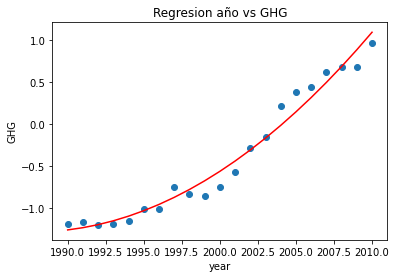

In [6]:
train = result.iloc[0:21,:] # Training set
x_train = train['Year'] # Seleccionando la columna de Edad
y_train = train['Total'] # Seleccionando la columna de Peso

test = result.iloc[21:27,:] # Test set
x_test = test['Year']
y_test = test['Total']

poly_fit = np.poly1d(np.polyfit(x_train,y_train, 2))

y_pred = poly_fit(x_test)
y1_pred = poly_fit(x_train)

print('Mean squared error (over testing set): %.2f'
      % mean_squared_error(y_test, y_pred))
plt.plot(x_train, y1_pred, c='r',linestyle='-')
plt.title('Regresion año vs GHG')
plt.xlabel('year')
plt.ylabel('GHG')
plt.scatter(x_train, y_train)
plt.show()

In [7]:
poly_fit.c

array([ 4.79352055e-03, -1.90564264e+01,  1.89382042e+04])

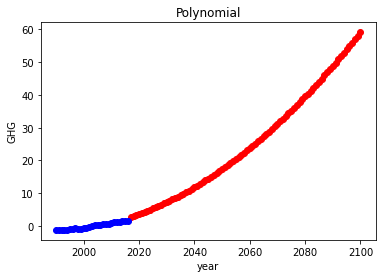

In [8]:
test = result.iloc[27:111,:] # Test set
x_test = test['Year']
valores_predc = list(poly_fit(x_test))
result.at[2017,'Total'] = valores_predc[0]
result.at[2018,'Total'] = valores_predc[1]
result.at[2019,'Total'] = valores_predc[2]
for i in range(81):  
  result.at[2020 + i,'Total'] = valores_predc[i + 3]
plt.title('Polynomial')
plt.xlabel('year')
plt.ylabel('GHG')
plt.scatter(x_test, valores_predc, c='red')
plt.scatter(result.iloc[0:27,:]['Year'], result.iloc[0:27,:]['Total'], c='blue')
plt.show()

### Exploramos los datos de la temperatura vs el total de GHG y el año.

Text(0.5, 0.92, 'Temperatura vs total GHG vs Año')

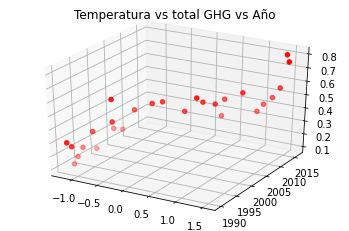

In [9]:
data = result.iloc[0:27,:] # Data for modelling
x_1 = data['Total']
x_4 = data['Year']
y = data['Median temperature anomaly from 1961-1990 average']

# Creating figure
fig = plt.figure()
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x_1, x_4, y, color = "red")
plt.title("Temperatura vs total GHG vs Año")

### Realizamos una regresion para estimar la cantidad de la temperatura de aqui al 2100

Coefficients: 
 [0.02621639 0.01505445]
Mean squared error (over training set): 0.01


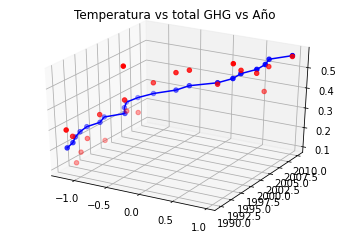

In [10]:
train = result.iloc[0:21,:] # Training set
x_train = train[['Total','Year']] # Seleccionando la columna de Edad
y_train = train['Median temperature anomaly from 1961-1990 average'] # Seleccionando la columna de Peso

test = result.iloc[21:27,:] # Test set
x_test = test[['Total','Year']]
y_test = test['Median temperature anomaly from 1961-1990 average']

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)
y1_pred = regr.predict(x_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
print('Mean squared error (over training set): %.2f'
      % mean_squared_error(y_test, y_pred))

# Creating plot
# Creating figure
fig = plt.figure()
ax = plt.axes(projection ="3d")
ax.scatter3D(x_train['Total'], x_train['Year'], y_train, color = "red")
ax.scatter3D(x_train['Total'], x_train['Year'], y1_pred, color = "blue")
plt.plot(x_train['Total'], x_train['Year'],y1_pred, color='blue')
#ax.plot_trisurf(x_train['Total'], x_train['Year'], y1_pred)
plt.title("Temperatura vs total GHG vs Año")
plt.show()

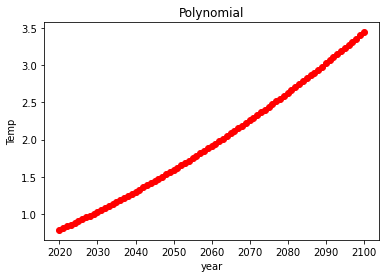

In [11]:
test = result.iloc[30:115,:] 
x_test = test[['Total','Year']]
valores_predcc = list(regr.predict(x_test))
for i in range(81):  
  result.at[2020 + i,'Median temperature anomaly from 1961-1990 average'] = abs(valores_predcc[i])

plt.title('Polynomial')
plt.xlabel('year')
plt.ylabel('Temp')
plt.scatter(x_test['Year'], [x for x in valores_predcc], c='red')
plt.show()

In [12]:
result

,Median temperature anomaly from 1961-1990 average,Total,Year
Year,,,
1990,0.296000,-1.193332,1990.0
1991,0.254000,-1.170972,1991.0
1992,0.105000,-1.202903,1992.0
1993,0.148000,-1.194477,1993.0
1994,0.208000,-1.154909,1994.0
...,...,...,...
2096,3.272991,54.905641,2096.0
2097,3.315384,55.948446,2097.0
2098,3.358029,57.000838,2098.0


### Usando el modelo anterior realizamos estimaciones de la temperatura dadas ciertas acciones

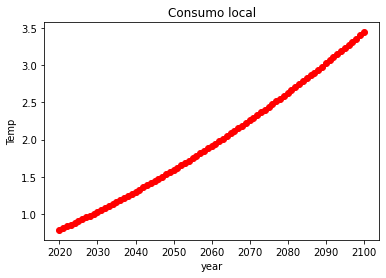

In [13]:
test = result.iloc[30:115,:] 
x_test = test[['Total','Year']]
for i in range(81):  
  result.at[2020 + i,'Total'] = (result.at[2020 + i,'Total']) - ((0.0075)*result.at[2020 + i,'Total'])
valores_predcc = list(regr.predict(x_test))

for i in range(81):  
  result.at[2020 + i,'Median temperature anomaly from 1961-1990 average'] = valores_predcc[i]

plt.title('Consumo local')
plt.xlabel('year')
plt.ylabel('Temp')
plt.scatter(x_test['Year'], [abs(x) for x in valores_predcc], c='red')
plt.show()

In [14]:
result

,Median temperature anomaly from 1961-1990 average,Total,Year
Year,,,
1990,0.296000,-1.193332,1990.0
1991,0.254000,-1.170972,1991.0
1992,0.105000,-1.202903,1992.0
1993,0.148000,-1.194477,1993.0
1994,0.208000,-1.154909,1994.0
...,...,...,...
2096,3.272991,54.493849,2096.0
2097,3.315384,55.528833,2097.0
2098,3.358029,56.573332,2098.0


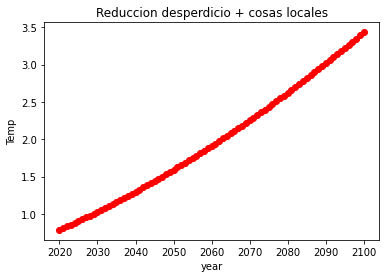

In [15]:
test = result.iloc[30:115,:] 
x_test = test[['Total','Year']]
for i in range(81):  
  result.at[2020 + i,'Total'] = (result.at[2020 + i,'Total']) - ((.03)*result.at[2020 + i,'Total'])
valores_predcc = list(regr.predict(x_test))

for i in range(81):  
  result.at[2020 + i,'Median temperature anomaly from 1961-1990 average'] = valores_predcc[i]

plt.title('Reduccion desperdicio + cosas locales')
plt.xlabel('year')
plt.ylabel('Temp')
plt.scatter(x_test['Year'], [abs(x) for x in valores_predcc], c='red')
plt.show()

In [16]:
result

,Median temperature anomaly from 1961-1990 average,Total,Year
Year,,,
1990,0.296000,-1.193332,1990.0
1991,0.254000,-1.170972,1991.0
1992,0.105000,-1.202903,1992.0
1993,0.148000,-1.194477,1993.0
1994,0.208000,-1.154909,1994.0
...,...,...,...
2096,3.262195,52.859033,2096.0
2097,3.304383,53.862968,2097.0
2098,3.346821,54.876132,2098.0


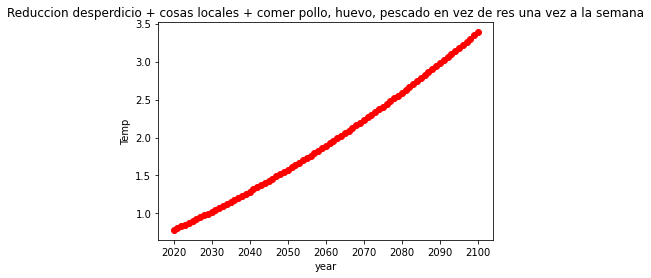

In [17]:
test = result.iloc[30:115,:] 
x_test = test[['Total','Year']]
for i in range(81):  
  result.at[2020 + i,'Total'] = (result.at[2020 + i,'Total']) - ((.05)*result.at[2020 + i,'Total'])
valores_predcc = list(regr.predict(x_test))

for i in range(81):  
  result.at[2020 + i,'Median temperature anomaly from 1961-1990 average'] = valores_predcc[i]

plt.title('Reduccion desperdicio + cosas locales + comer pollo, huevo, pescado en vez de res una vez a la semana')
plt.xlabel('year')
plt.ylabel('Temp')
plt.scatter(x_test['Year'], [abs(x) for x in valores_predcc], c='red')
plt.show()

### Resultado

In [18]:
result

,Median temperature anomaly from 1961-1990 average,Total,Year
Year,,,
1990,0.296000,-1.193332,1990.0
1991,0.254000,-1.170972,1991.0
1992,0.105000,-1.202903,1992.0
1993,0.148000,-1.194477,1993.0
1994,0.208000,-1.154909,1994.0
...,...,...,...
2096,3.219336,50.216081,2096.0
2097,3.260710,51.169819,2097.0
2098,3.302326,52.132326,2098.0
